# Cycle Data Visualization

***Declaration ***: The central idea and coding  is abstract  from Kevin mark ham youtube video seriese, Introduction to machine learning with scikit-learn video series. You can find link under resources section.  

# Basic purpose of EDA

•	Detecting of mistake

•	Checking of assumption

•	Primary selection of suitable models and tools

•	Determining relationship of the explanator variables(independent)

•	Detecting the direction and size of relationship between variables

# Libraries

In [3]:
import os,csv
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector as sql
import warnings; warnings.simplefilter('ignore')
# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# importing data from database

In [2]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM trip_weather')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM trip_weather', con=db_connection)
df1 = pd.DataFrame(data)
df1.dtypes

﻿sno                    int64
twdate                 object
Bike_rented             int64
Mean_Temperature_C      int64
Max_Temperature_F       int64
Min_TemperatureF        int64
Max_Humidity            int64
Min_Humidity            int64
Visibility_Miles        int64
Wind_Speed_MPH          int64
Precipitation_In      float64
Events_num              int64
Events                 object
month                   int64
year                    int64
dtype: object

In [3]:
# Data conversion and indexing
df1['twdate'] = pd.to_datetime(df1['twdate'])
df1.set_index('twdate', inplace=True)
df1.dtypes

﻿sno                    int64
Bike_rented             int64
Mean_Temperature_C      int64
Max_Temperature_F       int64
Min_TemperatureF        int64
Max_Humidity            int64
Min_Humidity            int64
Visibility_Miles        int64
Wind_Speed_MPH          int64
Precipitation_In      float64
Events_num              int64
Events                 object
month                   int64
year                    int64
dtype: object

# Bike Rental over two year Period

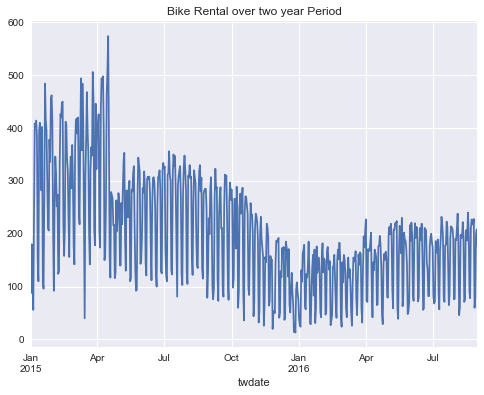

In [4]:
#df1.set_index('twdate', inplace=True)
a = df1['Bike_rented'].plot(title='Bike Rental over two year Period')

# Descriptive Statistics

# Total Trip by weekday

In [5]:
bikes = df1[['Bike_rented']]

In [6]:
bikes[:5]

,Bike_rented
twdate,
2015-01-01,88
2015-01-02,180
2015-01-03,104
2015-01-04,56
2015-01-05,244


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. The index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [7]:
bikes.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25',
               '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29',
               '2016-08-30', '2016-08-31'],
              dtype='datetime64[ns]', name='twdate', length=609, freq=None)

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [8]:
bikes.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14

We actually want the weekday, though:

In [9]:
bikes.index.weekday

array([3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2,

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [10]:
bikes['weekday'] = bikes.index.weekday
bikes[:5]

,Bike_rented,weekday
twdate,,
2015-01-01,88,3
2015-01-02,180,4
2015-01-03,104,5
2015-01-04,56,6
2015-01-05,244,0


This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby, if you're familiar with that. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [11]:
weekday_counts = bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Bike_rented
weekday,
0,18912
1,21817
2,21984
3,21967
4,20159
5,8898
6,7488


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [12]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Bike_rented
Monday,18912
Tuesday,21817
Wednesday,21984
Thursday,21967
Friday,20159
Saturday,8898
Sunday,7488


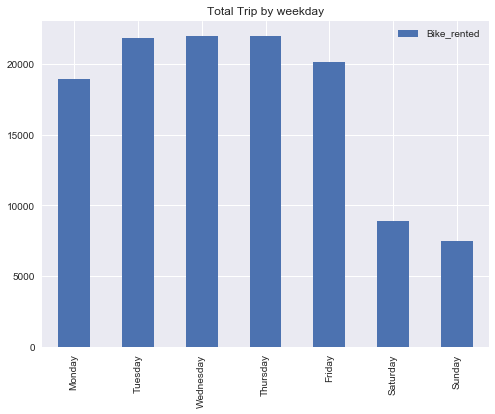

In [13]:
weekday_counts.plot(kind='bar', title='Total Trip by weekday')

# Total trip by Duration over Weekday

In [4]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM trip_clean')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM trip_clean', con=db_connection)

In [5]:
df2 = pd.DataFrame(data)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118931 entries, 0 to 118930
Data columns (total 28 columns):
﻿Sno                    118931 non-null int64
trip_id                 118931 non-null int64
starttime               118931 non-null object
stoptime                118931 non-null object
bikeid                  118931 non-null object
tripduration            118931 non-null float64
from_station_name       118931 non-null object
to_station_name         118931 non-null object
from_station_id         118931 non-null object
to_station_id           118931 non-null object
usertype                118931 non-null object
gender                  118931 non-null object
birthyear               118931 non-null int64
Sex_num                 118931 non-null int64
from_station_id_cat     118931 non-null object
from_station_id_num     118931 non-null int64
to_station_id_cat       118931 non-null object
to_station_id_num       118931 non-null int64
Day                     118931 non-null object
D

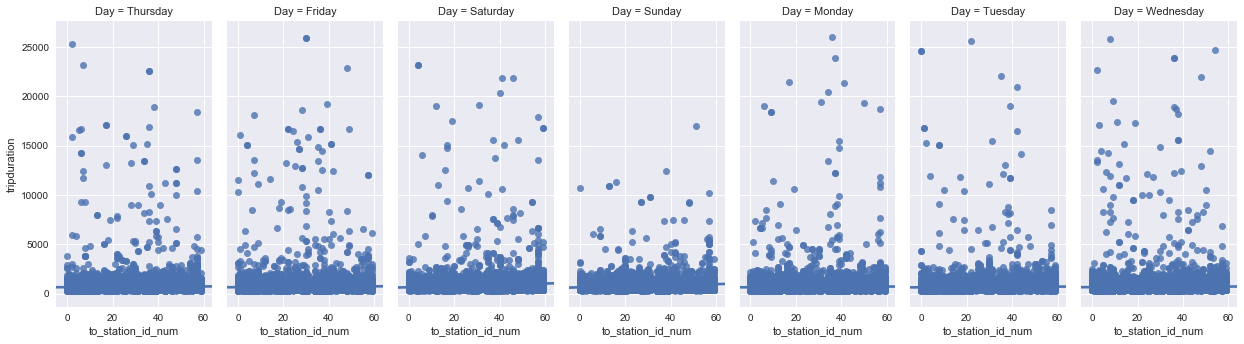

In [16]:
sns.lmplot(x="to_station_id_num", y="tripduration", col="Day", data=df2,aspect=.5);

# Bike Trip by Age

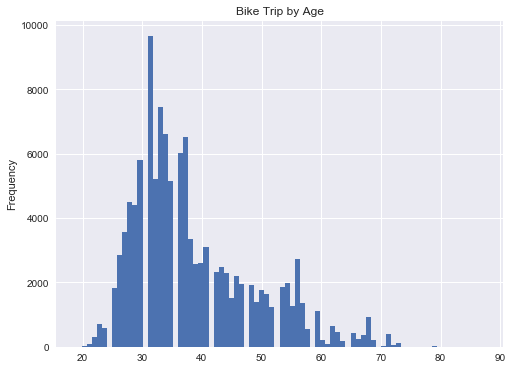

In [17]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM trip_clean_vw order by age')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM trip_clean_vw order by age', con=db_connection)
df2 = pd.DataFrame(data)
# Number of trips by Age
# Bike Trip by Age
m = df2.age.plot(kind='hist',title= 'Bike Trip by Age', bins=80)

# Number of trip on Friday by Hours

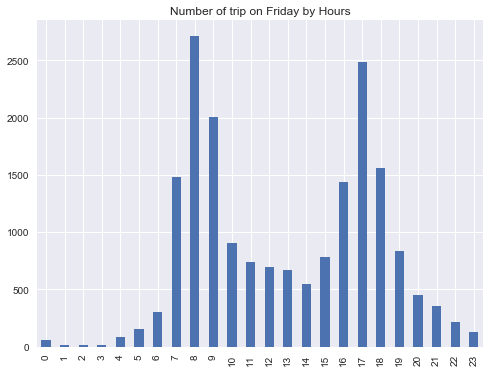

In [18]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM trip_clean_vw order by sthours')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM trip_clean_vw order by sthours', con=db_connection)
df2 = pd.DataFrame(data)
#Number of trips on Friday by Hours
df2 = df2[(df2.Day_num == 1)]
#df2.tail()
# compare with bar plot
j = df2.sthours.value_counts().sort_index().plot(kind='bar', title='Number of trip on Friday by Hours')

# Total Trip by Weekends

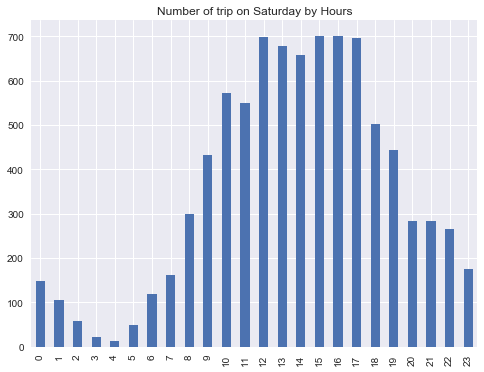

In [19]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM trip_clean_vw order by sthours')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM trip_clean_vw order by sthours', con=db_connection)
df2 = pd.DataFrame(data)
#Number of trips on Saturday by Hours
df2 = df2[(df2.Day_num == 2)]
#df2.tail()
# compare with bar plot
j = df2.sthours.value_counts().sort_index().plot(kind='bar', title='Number of trip on Saturday by Hours')

# Normal Distribution

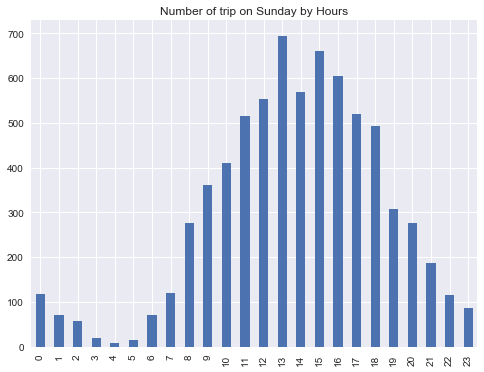

In [20]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM trip_clean_vw order by sthours')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM trip_clean_vw order by sthours', con=db_connection)
df2 = pd.DataFrame(data)
#Number of trips on Saturday by Hours
df2 = df2[(df2.Day_num == 3)]
#df2.tail()
# compare with bar plot
j = df2.sthours.value_counts().sort_index().plot(kind='bar', title='Number of trip on Sunday by Hours')

# Adding up the cyclists by Month

In [21]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM trip_weather')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM trip_weather', con=db_connection)
df1 = pd.DataFrame(data)
df1.dtypes

﻿sno                    int64
twdate                 object
Bike_rented             int64
Mean_Temperature_C      int64
Max_Temperature_F       int64
Min_TemperatureF        int64
Max_Humidity            int64
Min_Humidity            int64
Visibility_Miles        int64
Wind_Speed_MPH          int64
Precipitation_In      float64
Events_num              int64
Events                 object
month                   int64
year                    int64
dtype: object

In [22]:
# Add up the number of cyclists by month, and plot!
df1['twdate'] = pd.to_datetime(df1['twdate'])
df1.set_index('twdate', inplace=True)
df1.dtypes

﻿sno                    int64
Bike_rented             int64
Mean_Temperature_C      int64
Max_Temperature_F       int64
Min_TemperatureF        int64
Max_Humidity            int64
Min_Humidity            int64
Visibility_Miles        int64
Wind_Speed_MPH          int64
Precipitation_In      float64
Events_num              int64
Events                 object
month                   int64
year                    int64
dtype: object

In [23]:
bikes = df1[['Bike_rented']]
bikes[:5]

,Bike_rented
twdate,
2015-01-01,88
2015-01-02,180
2015-01-03,104
2015-01-04,56
2015-01-05,244


In [24]:
bikes.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25',
               '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29',
               '2016-08-30', '2016-08-31'],
              dtype='datetime64[ns]', name='twdate', length=609, freq=None)

In [25]:
bikes['month'] = bikes.index.month
bikes[:5]

,Bike_rented,month
twdate,,
2015-01-01,88,1
2015-01-02,180,1
2015-01-03,104,1
2015-01-04,56,1
2015-01-05,244,1


In [26]:
month_counts = bikes.groupby('month').aggregate(sum)
month_counts

,Bike_rented
month,
1,12440
2,11539
3,14142
4,13265
5,12048
6,12277
7,12759
8,12590
9,6440


In [27]:
month_counts.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts

,Bike_rented
Jan,12440
Feb,11539
Mar,14142
Apr,13265
May,12048
Jun,12277
Jul,12759
Aug,12590
Sep,6440
Oct,6195


# Total Trip by Month

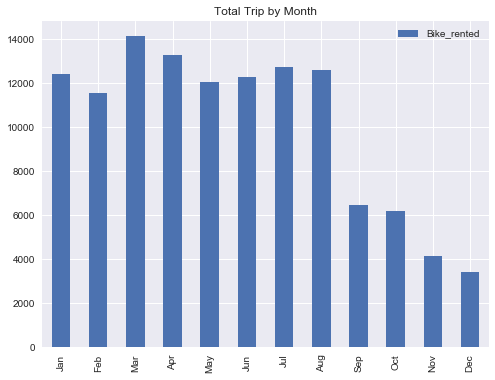

In [28]:
a = month_counts.plot(kind='bar', title='Total Trip by Month')

# Bike rental Distribution over Weekday and Month  

In [29]:
# Scattre Matrix Plot
bikes = df1[['Bike_rented']]
bikes.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25',
               '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29',
               '2016-08-30', '2016-08-31'],
              dtype='datetime64[ns]', name='twdate', length=609, freq=None)

In [30]:
# Add up the number of cyclists by weekday, and plot!
bikes['weekday'] = bikes.index.weekday
# Add up the number of cyclists by month, and plot!
bikes['month'] = bikes.index.month

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4D8DD2EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F4A3520C50>]], dtype=object)

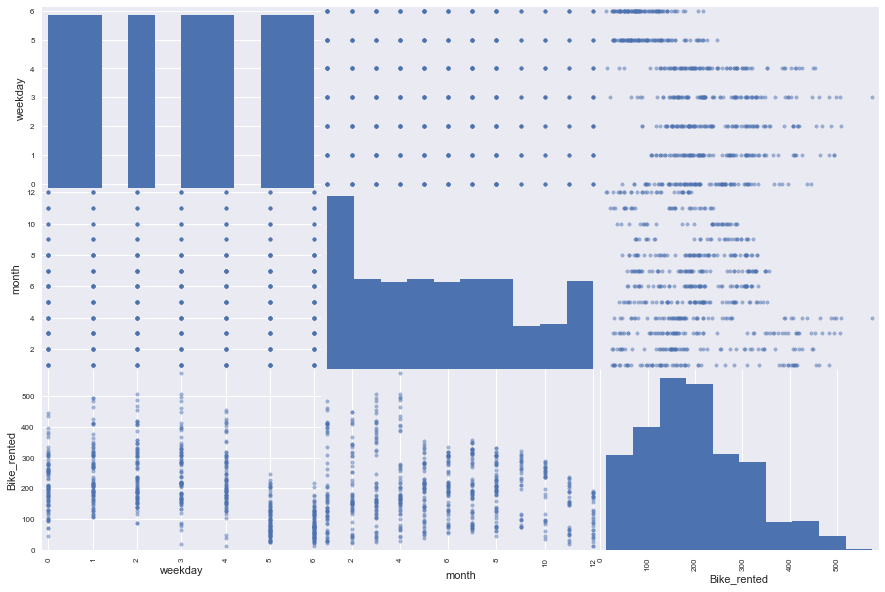

In [31]:
pd.scatter_matrix(bikes[['weekday', 'month', 'Bike_rented']], figsize=(15, 10))

# Number of Trips by Age

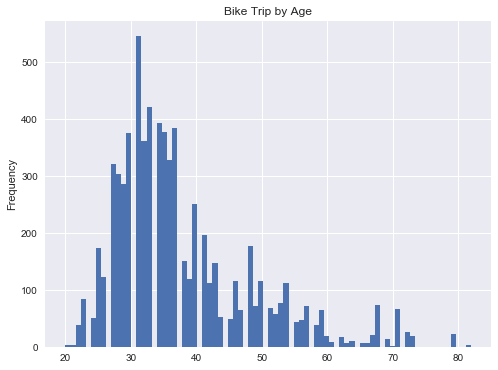

In [32]:
# Bike Trip by Age
df2.age.plot(kind='hist',title= 'Bike Trip by Age', bins=80)

# Number of Trips by Gender

In [33]:
df2.gender.value_counts()

Male      5281
Female    1823
Name: gender, dtype: int64

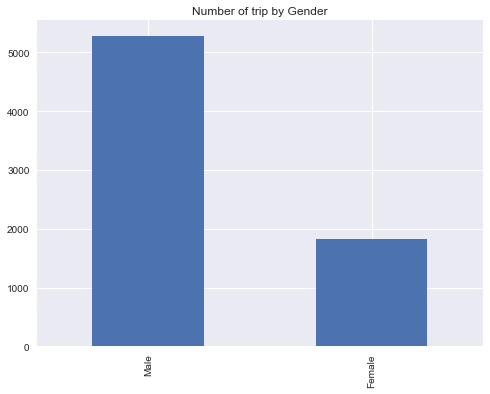

In [34]:
# compare with bar plot
df2.gender.value_counts().plot(kind='bar', title='Number of trip by Gender')

# Number of Trips by Hours

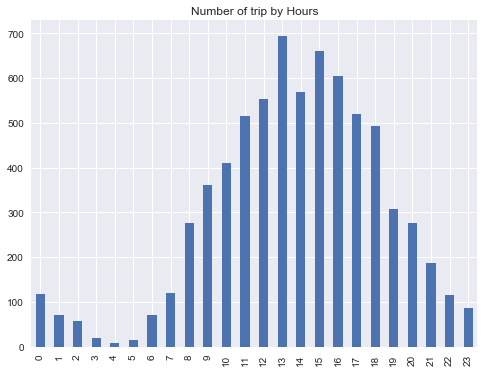

In [35]:
# compare with bar plot
df2.sthours.value_counts().sort_index().plot(kind='bar', title='Number of trip by Hours')

#  Handling Anomalous Values (Outliers)

Trip distribution in hours per day of the week

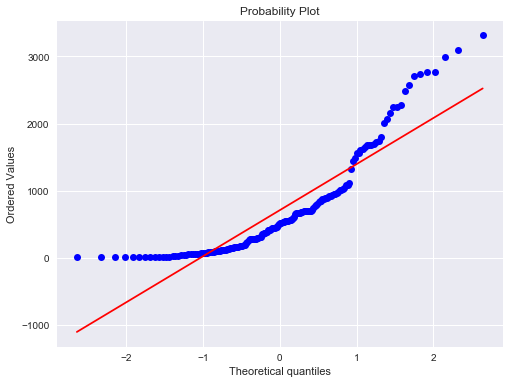

In [6]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM trip_clean_vw order by Day_num')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM trip_clean_vw order by Day_num', con=db_connection)
df2 = pd.DataFrame(data)
#data = df2.groupby('Day').sthours.value_counts().sort_index()
#plot data
#fig, ax = plt.subplots(figsize=(18,10))
import numpy as np 
import pylab 
import scipy.stats as stats
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
k = df2.groupby('Day').sthours.value_counts().sort_index()
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(k, dist="norm", plot=pylab)
pylab.show( )

A QQ plot is used to compare the shapes of distribution, providing a graphical view of how properties such as location, scale, and skewness are similar or different in two distribution.

The quantiles of the theoretical and data distribution agree, the plotted points fall on or near the line y = x but in our case, they are bit far. The reason of that, bicycle rental depend on weather, day of hours and time of the day. That, make it possible that our distribution of hours over seven days could be different. Each day, different hours have totally different rental count.

# Box Plot
 The Box plot is a nice way to graphically represent the data in order to communicate the data through their quartiles. Following is the five number summries:

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(More useful than mean and standard deviation for describing skewed distributions)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

In [7]:
# sort the spirit column
df2.age.values

array([35, 54, 34, ..., 44, 37, 34], dtype=int64)

In [8]:
# show "five-number summary" for spirit
df2.age.describe()

count    118931.000000
mean         38.487333
std          10.208141
min          19.000000
25%          31.000000
50%          36.000000
75%          44.000000
max          87.000000
Name: age, dtype: float64

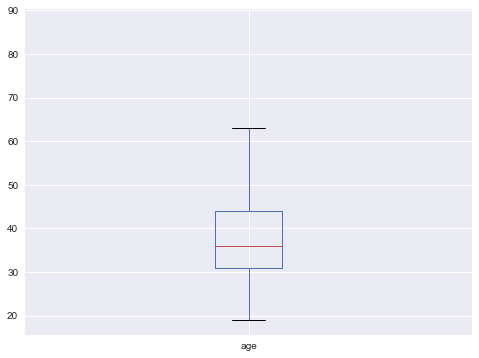

In [9]:
# compare with box plot
df2.age.plot(kind='box')

It is not possible for a 79-year-old person to bicycle for more than one hour. This is our outlier and we need to get rid of this tuple. But when, this study contact Garda Head quarter and speak with Sargent on duty. The gentelman confirm that there is no age limit on bicycling on road. As long as, Rider comply with local laws.

https://www.garda.ie/en/FAQs/

To avoid any problem in future we decide to delete outlier from age column

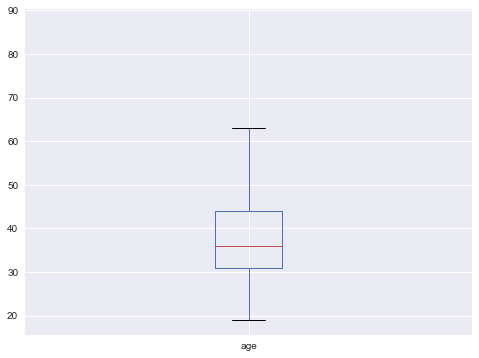

In [10]:
# compare with box plot
df2.age.plot(kind='box')

# Power Transformation

- If we look at the middle 50%, we dont have symmetry (data is right skew)

- If we look at the tail, the re-expressed data is almost symmetrical


In [11]:
df2[df2.age >= 78]

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,...,to_station_id_num,Day,Day_cat,Day_num,sthours,stphours,tripduration_minutes,age,bmonth,tcdate
6878,73927,2015-05-15,2015-05-15,SEA00137,479.406,Cal Anderson Park / 11th Ave & Pine St,12th Ave & E Mercer St,CH-08,CH-15,Member,...,20,Friday,Friday,0,16,17,7.99,79,5,None
18542,231080,2016-07-08,2016-07-08,SEA00423,1817.524,E Pine St & 16th Ave,E Pine St & 16th Ave,CH-07,CH-07,Member,...,16,Friday,Friday,0,16,16,30.29,87,7,None
25570,71814,2015-05-11,2015-05-11,SEA00389,794.505,12th Ave & E Mercer St,E Harrison St & Broadway Ave E,CH-15,CH-02,Member,...,12,Monday,Monday,1,6,6,13.24,79,5,None
26138,78890,2015-05-25,2015-05-25,SEA00042,6482.742,12th Ave & E Mercer St,12th Ave & E Mercer St,CH-15,CH-15,Member,...,20,Monday,Monday,1,10,12,108.05,79,5,None
36571,220584,2016-06-13,2016-06-13,SEA00194,339.880,E Harrison St & Broadway Ave E,Pine St & 9th Ave,CH-02,SLU-16,Member,...,39,Monday,Monday,1,18,18,5.66,79,6,None
42107,81953,2015-05-30,2015-05-30,SEA00425,421.748,12th Ave & E Mercer St,Harvard Ave & E Pine St,CH-15,CH-09,Member,...,18,Saturday,Saturday,2,12,12,7.03,79,5,None
43680,129239,2015-08-15,2015-08-15,SEA00051,406.541,Terry Ave & Stewart St,2nd Ave & Pine St,SLU-20,CBD-13,Member,...,9,Saturday,Saturday,2,17,17,6.78,82,8,None
43687,129270,2015-08-15,2015-08-15,SEA00393,521.017,2nd Ave & Pine St,Terry Ave & Stewart St,CBD-13,SLU-20,Member,...,43,Saturday,Saturday,2,18,18,8.68,82,8,None
45604,192757,2016-03-26,2016-03-26,SEA00413,351.408,12th Ave & E Mercer St,Cal Anderson Park / 11th Ave & Pine St,CH-15,CH-08,Member,...,17,Saturday,Saturday,2,12,12,5.86,79,3,None
45606,192769,2016-03-26,2016-03-26,SEA00324,346.120,Harvard Ave & E Pine St,E Harrison St & Broadway Ave E,CH-09,CH-02,Member,...,12,Saturday,Saturday,2,12,12,5.77,79,3,None


# Cycle Trip by Age (Scatter Plot)

A point plot between two variables used to understand the spread of data.The spread of data allows us to understand if the data has a no-linear or linear relationship and the relative degree of the correlation in the data. This technique allow us to detect outliers in the data.

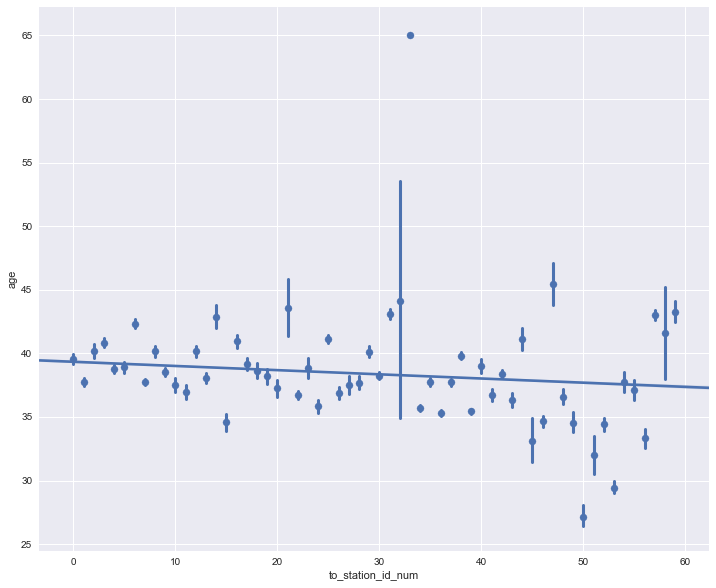

In [12]:
# compare with Scatter plot
import matplotlib.pylab as plt

%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 16
sns.regplot(x="to_station_id_num", y="age", data=df2, x_estimator=np.mean);

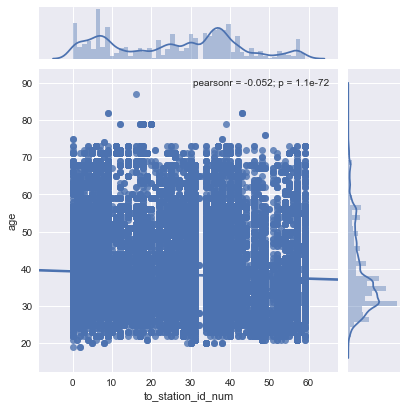

In [13]:
# compare with Scatter plot
import matplotlib.pylab as plt

%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 17
sns.jointplot(x="to_station_id_num", y="age", data=df2, kind="reg");

The above plot displayin the estimate of central tendency along with a confidence interval:
as we could easiy notice an outlier with the gae limit of 65.

In [14]:
# Trip Duration vs Gender

The following graphs is displaying cycling duration for male and female. As you can see much difference in bicycling time duration between two genders. The Male bicycling more than female in Seattle area that could be because of law condition or weather.

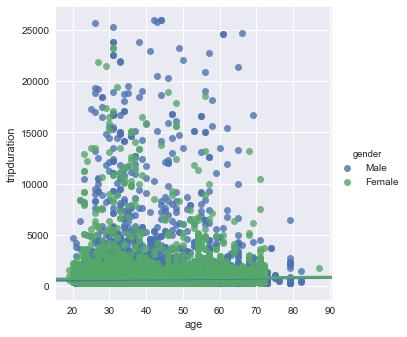

In [15]:
# compare with Scatter plot
import matplotlib.pylab as plt

%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 17
sns.lmplot(x="age", y="tripduration", hue="gender", data=df2);
#sns.residplot(x="age", y="tripduration", data=df2, scatter_kws={"s": 80});

# Trip Duration and vs id station

In [16]:
# show "five-number summary" for spirit
df2.tripduration_minutes.describe()
#df2.plot(kind='scatter', x='to_station_id_num', y='tripduration_minutes', s=120, c=colors, grid=True,fontsize=10, ax=ax)

count    118931.000000
mean         11.400080
std          12.630169
min           5.000000
25%           6.980000
50%           9.180000
75%          12.710000
max         432.860000
Name: tripduration_minutes, dtype: float64

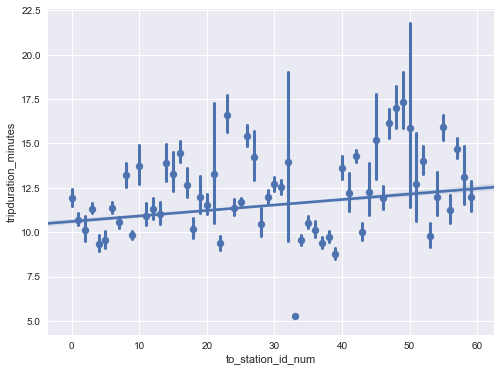

In [17]:
# compare with Scatter plot
import matplotlib.pylab as plt

%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

sns.regplot(x="to_station_id_num", y="tripduration_minutes", data=df2, x_estimator=np.mean)

The above picture clearly displaying the linear relationship, between time and to station id and very small amount of outlier. The different people have different energy level and it is possible for a one-person cycle much faster than another.

# Bike Rental and Effect of Weather

"Existing studies, however, hardly address the effects of weather on cycling durations and often lack assessments of the combined effects of different meteorological variables and potential nonlinearity of these effects."
(Integrated Weather Effects on Cycling Shares, Frequencies, and Durations in Rotterdam, the Netherlands ,LARS BÖCKER)

https://journals.ametsoc.org/doi/full/10.1175/WCAS-D-13-00066.1

In [18]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM weather_list order by Events_num')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM weather_list order by Events_num', con=db_connection)
df4 = pd.DataFrame(data)
df4

,Events_num,Events
0,0,Fog
1,1,"Fog, Rain"
2,2,Rain
3,4,Rain-Snow
4,5,Rain-Thunderstorm
5,6,Sunny


In [19]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM trip_weather order by Events_num')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM trip_weather order by Events_num', con=db_connection)
df5 = pd.DataFrame(data)

In [20]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 15 columns):
﻿sno                  609 non-null int64
twdate                609 non-null object
Bike_rented           609 non-null int64
Mean_Temperature_C    609 non-null int64
Max_Temperature_F     609 non-null int64
Min_TemperatureF      609 non-null int64
Max_Humidity          609 non-null int64
Min_Humidity          609 non-null int64
Visibility_Miles      609 non-null int64
Wind_Speed_MPH        609 non-null int64
Precipitation_In      609 non-null float64
Events_num            609 non-null int64
Events                609 non-null object
month                 609 non-null int64
year                  609 non-null int64
dtypes: float64(1), int64(12), object(2)
memory usage: 71.4+ KB


# Regression between Events and Bike Rental

Following graph displayed the scatterplot of two variables, Event number in X axis and Bike rented in y axis, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression

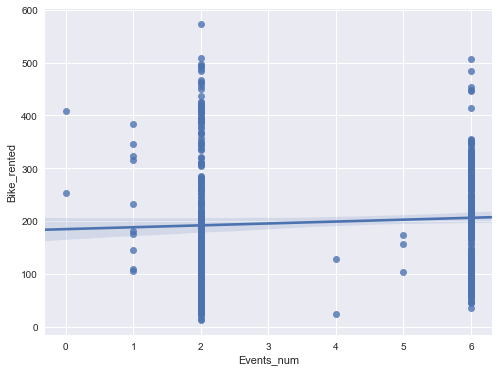

In [21]:
sns.regplot(x="Events_num", y="Bike_rented", data=df5)

In [22]:
df4

,Events_num,Events
0,0,Fog
1,1,"Fog, Rain"
2,2,Rain
3,4,Rain-Snow
4,5,Rain-Thunderstorm
5,6,Sunny


In [23]:
Events = df5.groupby('Events').aggregate(sum)
Events

,﻿sno,Bike_rented,Mean_Temperature_C,Max_Temperature_F,Min_TemperatureF,Max_Humidity,Min_Humidity,Visibility_Miles,Wind_Speed_MPH,Precipitation_In,Events_num,month,year
Events,,,,,,,,,,,,,
Fog,459,661,22,117,94,186,124,15,3,0.02,0,11,4030
"Fog, Rain",2792,2320,63,508,384,944,639,64,34,1.06,10,48,20152
Rain,99496,54056,2574,15760,12270,25591,16232,2626,1393,45.05,572,1302,576404
Rain-Snow,906,152,5,87,60,187,121,18,8,0.05,8,2,4032
Rain-Thunderstorm,1363,433,27,160,133,262,182,28,34,1.25,15,27,6046
Sunny,128840,63603,5655,23045,17590,24356,12684,3002,1332,10.50,1836,2094,616715


# Bike Rented vs Events

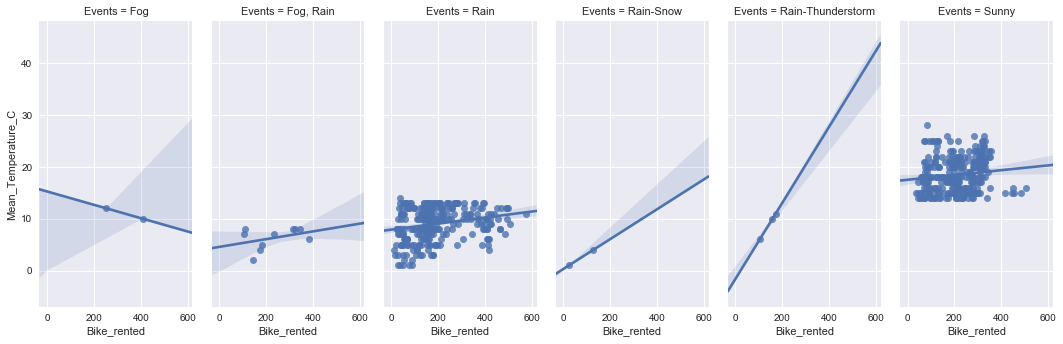

In [24]:
#a = Events.plot(kind='bar', title='Total Trip by Events')
sns.lmplot(x="Bike_rented", y="Mean_Temperature_C", col="Events", data=df5,
           aspect=.5);

# Bike Rented vs Visibility Miles

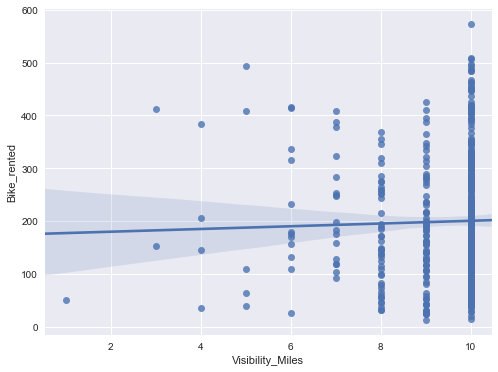

In [25]:
g = sns.regplot(x="Visibility_Miles", y="Bike_rented", data=df5)

# Bike Rental vs Wind Speed MPH

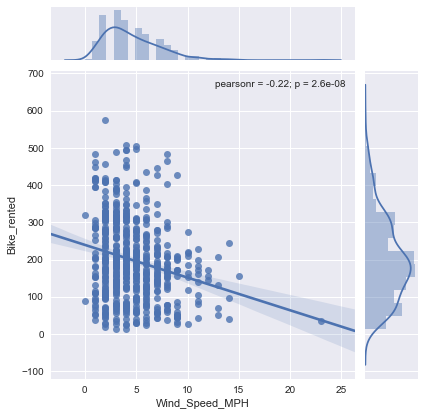

In [26]:
sns.jointplot(x="Wind_Speed_MPH", y="Bike_rented", data=df5, kind="reg");

# Regression between Temprature and Bike Rental

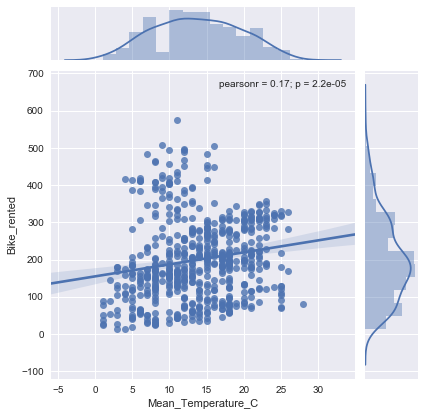

In [27]:
#Regression between Temprature and Bike Rental
sns.jointplot(x="Mean_Temperature_C", y="Bike_rented", data=df5, kind="reg");

# Regression between precipitation and Bike Rental

# Precipitation
The definition of precipitation is any form of water - liquid or solid - falling from the sky. It includes rain, sleet, snow, hail and drizzle plus a few less common occurrences such as ice pellets, diamond dust and freezing rain.

https://www.metoffice.gov.uk/learning/learn-about-the-weather/weather-phenomena/what-is-precipitation

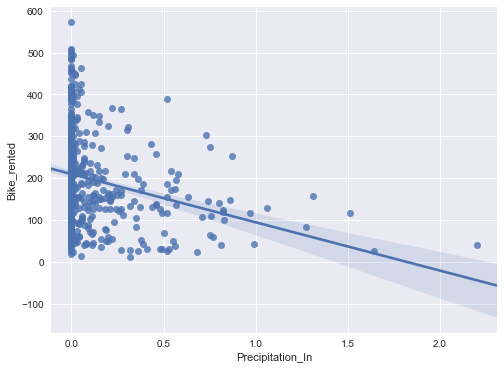

In [28]:
#Regression between Temprature and Bike Rental
sns.regplot(x="Precipitation_In", y="Bike_rented", data=df5)

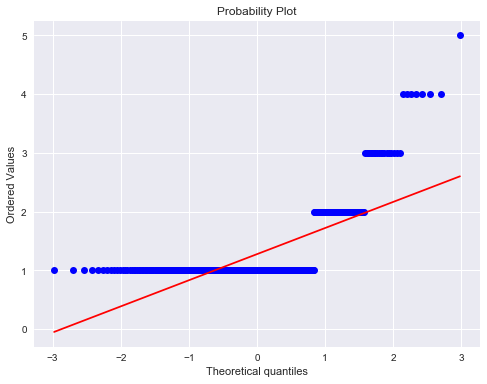

In [29]:
import numpy as np 
import pylab 
import scipy.stats as stats
k = df5.groupby('Bike_rented').Precipitation_In.value_counts().sort_index()
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(k, dist="norm", plot=pylab)
pylab.show( )

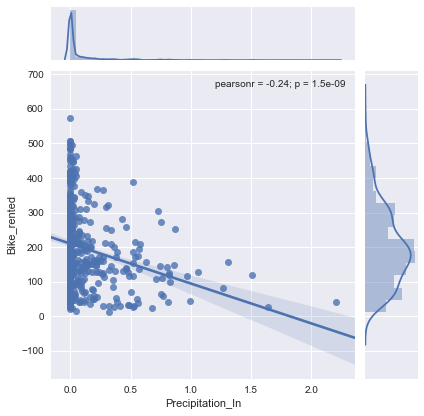

In [30]:
sns.jointplot(x="Precipitation_In", y="Bike_rented", data=df5, kind="reg");

The lowest the precipitation is better for bicycling condition and from the above  graph it is quite clear there is a negative regression between bike rental and precipitation with the pearsonr = -0.24 and p=1.5e

# Bike rental vs Temperature

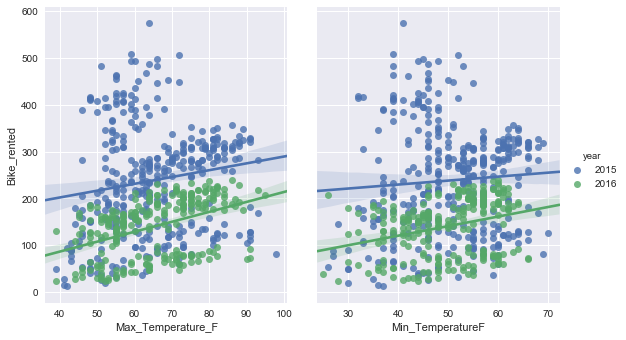

In [31]:
sns.pairplot(df5, x_vars=["Max_Temperature_F", "Min_TemperatureF"], y_vars=["Bike_rented"],
             hue="year", size=5, aspect=.8, kind="reg");

--------------------------------------------------------

## Resources
References:*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*
- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)